In [1]:
# modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('Data.csv') # read data

In [3]:
df.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


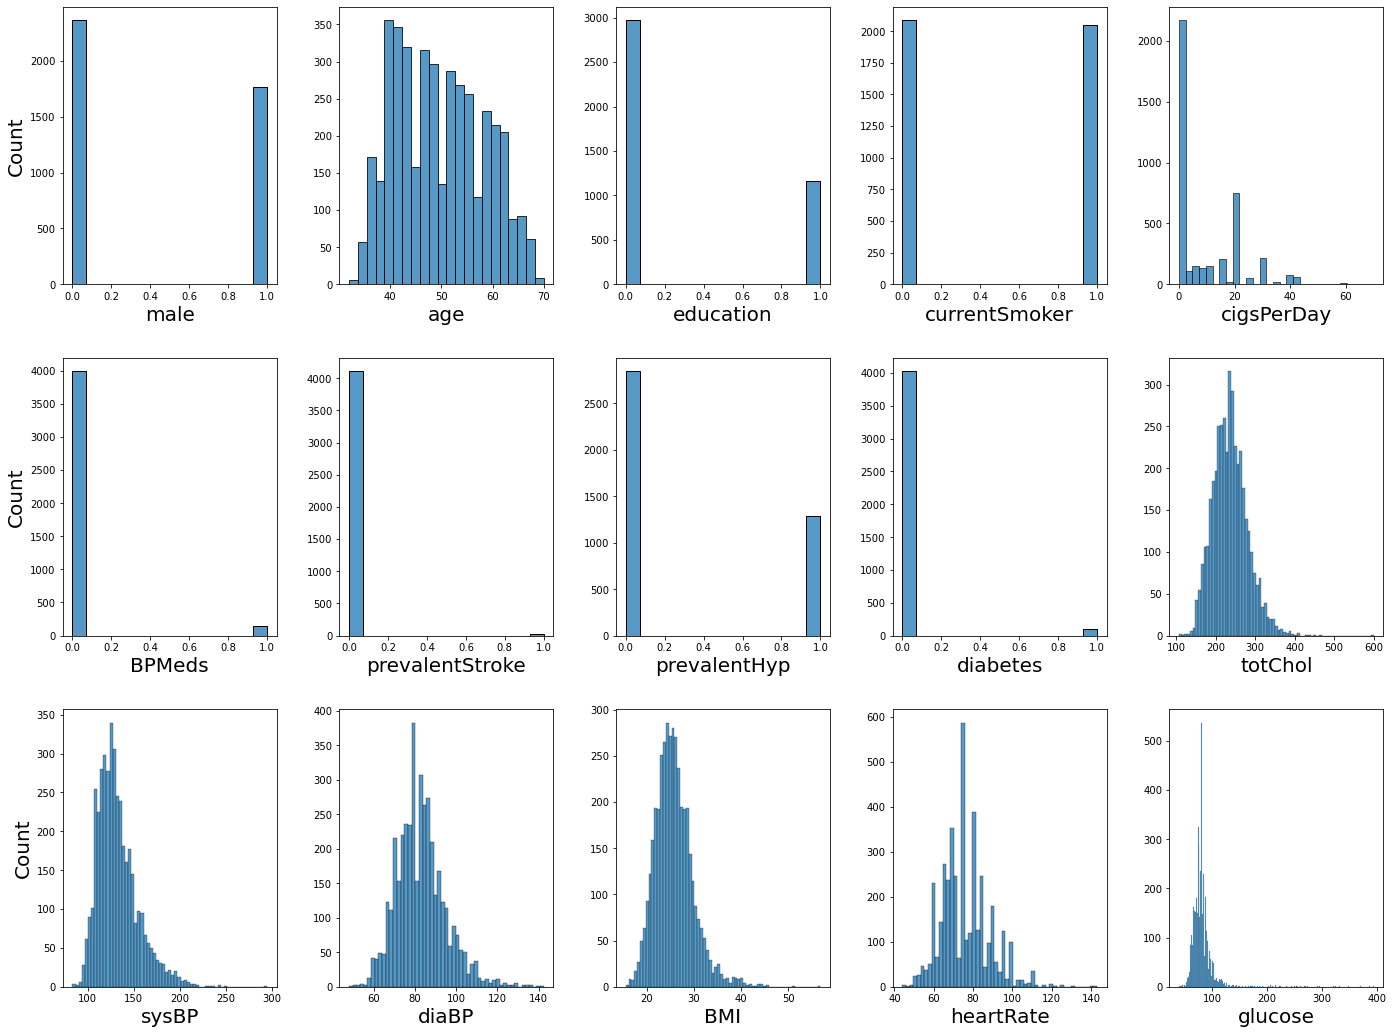

In [5]:
fig, ax = plt.subplots(3, 5, figsize = (20,15),)
colNames = df.columns # variable names
for i in range(3):
    for j in range(5):  
        sns.histplot(df[colNames[5*i+j]], ax = ax[i,j]) # plot histogram for each column
        ax[i,j].set_xlabel(colNames[5*i+j],fontsize=20) # increase x label font size
        if j ==0:
            ax[i,j].set_ylabel('Count',fontsize=20)
        else:
            ax[i,j].set_ylabel('')
fig.tight_layout(pad=3.0) 
plt.show()

Text(0.5, 0, 'TenYearCHD')

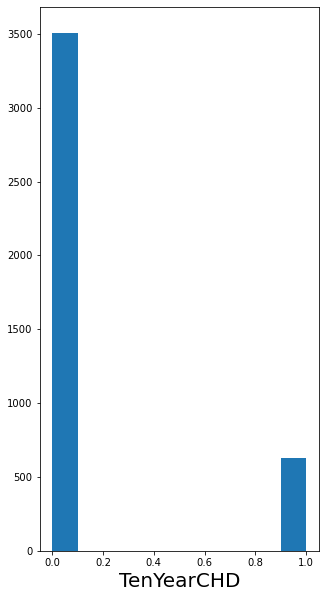

In [6]:
#target
fig,ax=plt.subplots(figsize=(5,10))
plt.hist(df.TenYearCHD)
ax.set_xlabel('TenYearCHD',fontsize=20)

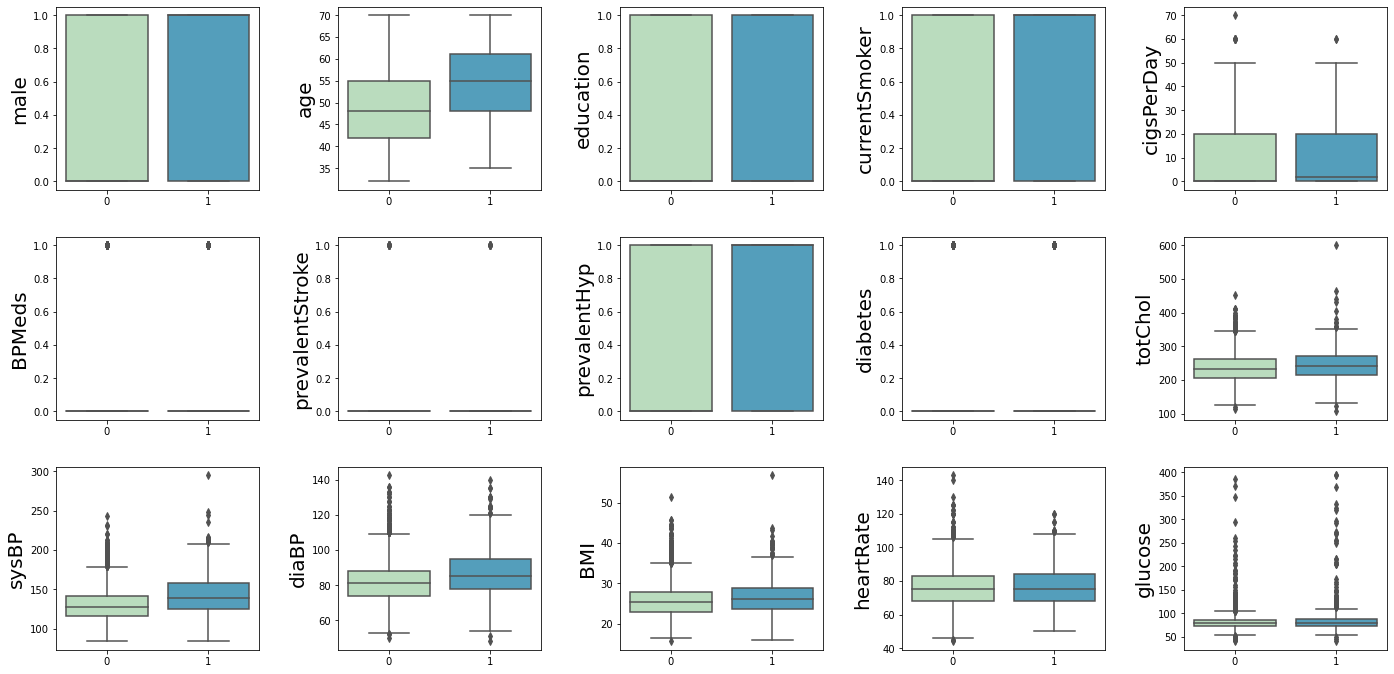

In [7]:
#plot boxplots
fig, ax = plt.subplots(3, 5, figsize = (20,10))
for i in range(3):
    for j in range(5):
        sns.boxplot(data=df, y=colNames[5*i+j], x='TenYearCHD', ax=ax[i,j], palette= 'GnBu')
        ax[i,j].set_ylabel(colNames[5*i+j],fontsize=20)
        ax[i,j].set_xlabel('')
fig.tight_layout(pad=3.0) 
plt.show()

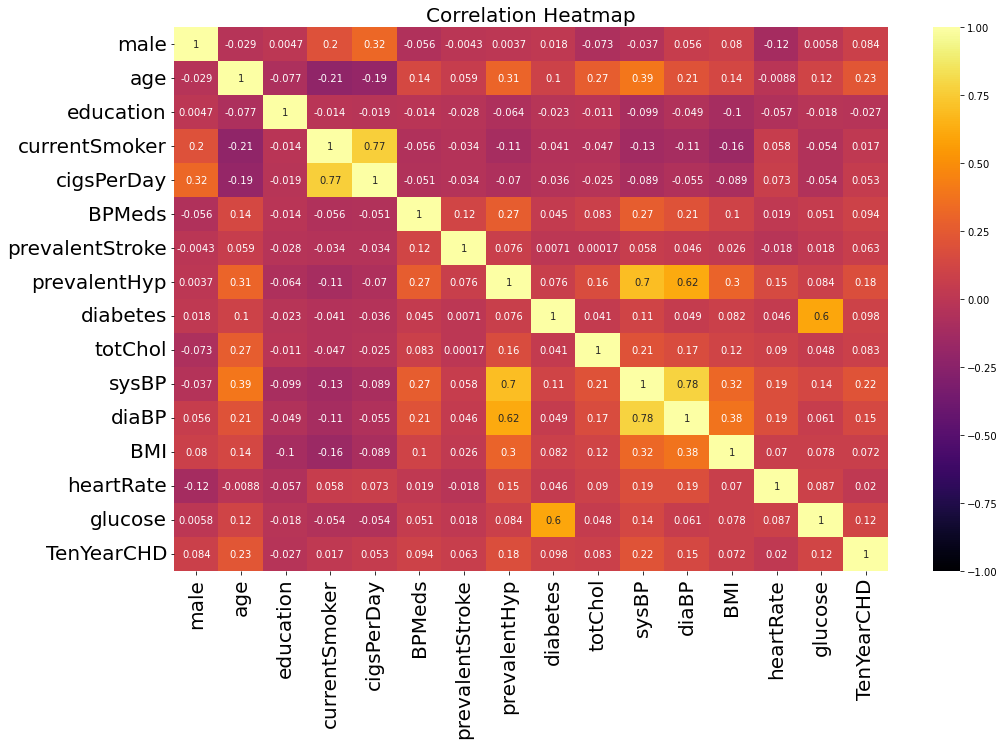

In [8]:
fig, ax = plt.subplots(figsize=(16, 10)) # increase figure size
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'inferno') # plot heatmap with seaborn
plt.setp(ax.get_xticklabels(), fontsize = 20) # change x tick labels font size 
plt.setp(ax.get_yticklabels(), fontsize = 20) # change y tick labels font size
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}) # give title to heatmap
plt.show()

In [9]:
X = df.drop('TenYearCHD', axis = 1)
y = df.TenYearCHD
y.value_counts(normalize=True)*100 # balance of target classes in percent

0    84.805226
1    15.194774
Name: TenYearCHD, dtype: float64

The imbalance of 85% to 15% is high for target classes

In [10]:
# Split Data sets into training and testing sets using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Save all as csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [20]:
# transform imbalanced classification data set into balanced classification dataset with SMOTE() (synthetic minority oversampling technique)
smote = SMOTE(sampling_strategy = 'minority')

X_smote, y_smote = smote.fit_resample(X, y) # oversample the dataset


# Split balanced data sets into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.30)

# Save all as csv
X_train_smote.to_csv('X_train_smote.csv', index=False)
X_test_smote.to_csv('X_test_smote.csv', index=False)
y_train_smote.to_csv('y_train_smote.csv', index=False)
y_test_smote.to_csv('y_test_smote.csv', index=False)

In [21]:
# New class distribution for training set
print(Counter(y_train_smote))

Counter({0: 2463, 1: 2444})


After applying synthetic minority oversampling technique we have balanced classes for target variable

In [14]:
# Merging X_smote and y_smote to compare with original data
data_smote = X_train_smote
data_smote['TenYearCHD'] = y_train_smote

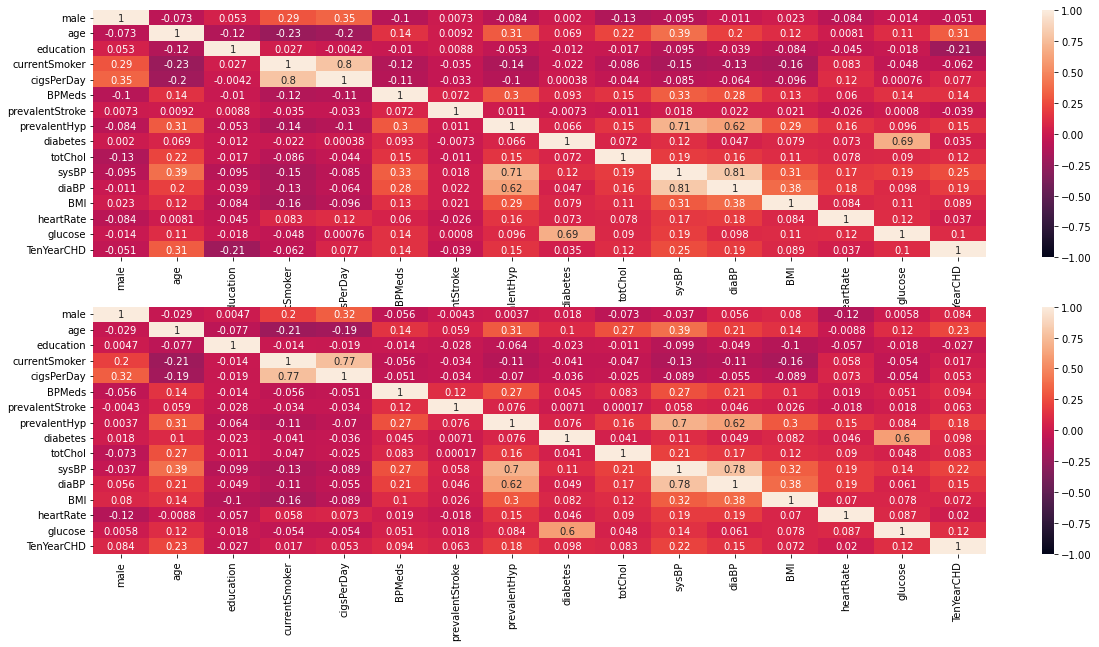

In [15]:
# Comparing Correlation heatmap for original and balanced data
fig, ax = plt.subplots(2,1, figsize=(20, 10)) 

sns.heatmap(data_smote.corr(), vmin=-1, vmax=1, annot=True, ax = ax[0]) # plot heatmap with seaborn
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax = ax[1]) # plot heatmap with seaborn


plt.show()

From above heatmaps it can be said that synthetic minority oversampling technique gave us similar dataset with balanced target classes